In [1]:
import ROOT as R
from tools import ABS
R.gStyle.SetErrorX(0)
R.gStyle.SetOptStat(0)
R.gStyle.SetOptFit(1111)


Welcome to JupyROOT 6.24/06


 FCN=156.744 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          43 TOTAL
                     EDM=1.1212e-17    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.99018e-01   1.22437e-03   1.22437e-03  -3.86762e-06


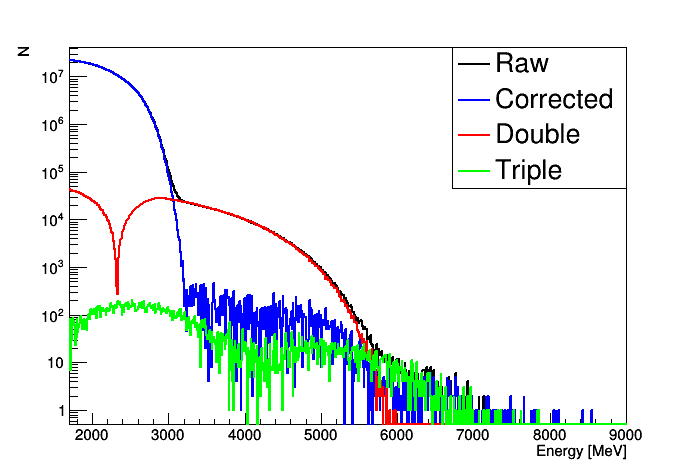

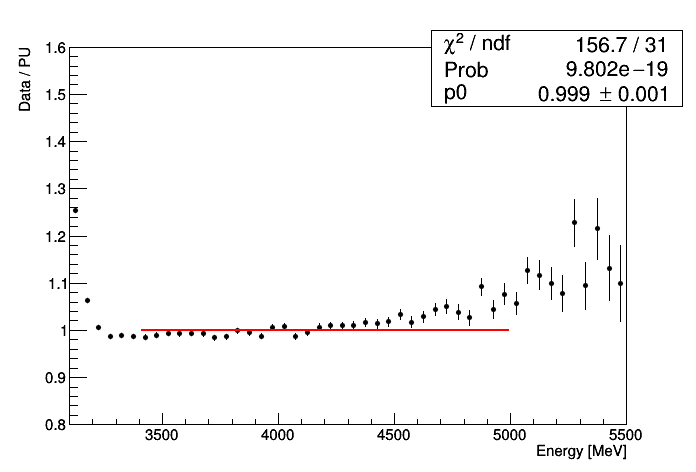

In [64]:
f = R.TFile('../data/nominal_fit/Run4U_Tpu_seedscan_fully149_2.78.root','read')
raw = f.Get('energy_raw').Clone()
corr = f.Get('subs_e').Clone()
pu_d = f.Get('pileup_e_double').Clone()
pu_t = f.Get('pileup_e_tri').Clone()


names = ['Raw','Corrected','Double','Triple']
colors = [R.kBlack,R.kBlue,R.kRed,R.kGreen]
hists = [raw,corr,pu_d,pu_t]

c = R.TCanvas()
c.SetLogy(1)
leg = R.TLegend(0.65,0.6,0.9,0.9)
for n in range(4):
    hists[n] = ABS(hists[n])
    hists[n].SetStats(0)
    hists[n].SetLineColor(colors[n])
    hists[n].SetLineWidth(2)
    hists[n].GetXaxis().SetRangeUser(1700,9000)
    leg.AddEntry(hists[n],names[n],'l')
    hists[n].Draw('histsame')
    hists[n].SetTitle(';Energy [MeV]; N')
leg.Draw()
c.Draw()

c2 = R.TCanvas()
ratio_i = f.Get('energy_raw').Clone()
pu = f.Get('pileup_e_double').Clone()
put = f.Get('pileup_e_tri').Clone()
pu.Add(put)

ratio = pu.Clone()
ratio.Reset()
ratio.Sumw2()
ratio.Add(ratio_i)


# ratio.Divide(pu)
ratio.Rebin(5)
pu.Rebin(5)
func = R.TF1('linefit','[0]',3400,5000)
ratio.Divide(pu)
ratio.GetXaxis().SetRangeUser(3100,5500)
ratio.GetYaxis().SetRangeUser(0.8,1.6)

# ratio.Draw('hist')

# pu.Draw('same')
ratio.Draw('e')
ratio.SetMarkerSize(0.6)
ratio.SetMarkerColor(1)
ratio.SetMarkerStyle(8)
# ratio.SetStats(0)
ratio.SetLineColor(1)
ratio.SetTitle(';Energy [MeV]; Data / PU')
ratio.Fit('linefit','REMS')
line = R.TLine(3100,1,5500,1)
func.SetLineWidth(2)
# print (ratio.GetXaxis().GetBinWidth(1))
# line.Draw()

c2.Draw()

40000.0 400000.0
269 2681
40000.0 400000.0
269 2681


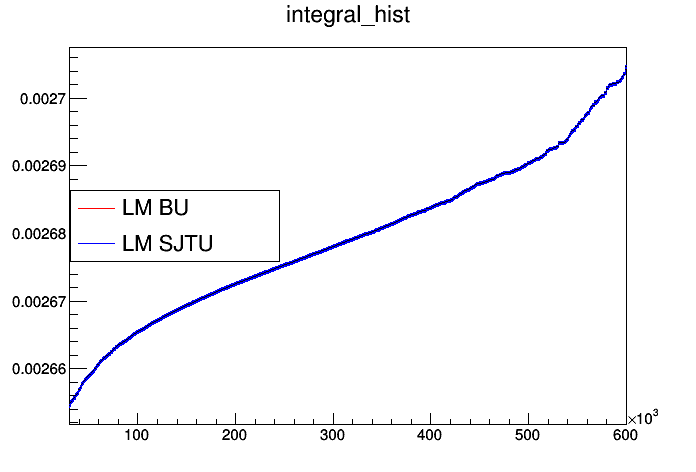

In [68]:
f_lm = R.TFile('/Users/cheng/WorkRun4/data/nominal_fit/Run4U_lm_int_sjtu.root','read')
f_lm_emp = R.TFile('/Users/cheng/WorkRun4/data/nominal_fit/Run4U_lm_int_bu.root','read')

lm_int = f_lm.Get('integral_hist').Clone()
lm_int_emp = f_lm_emp.Get('integral_hist').Clone()

colors  = [R.kRed,R.kBlue]
names = ['LM BU','LM SJTU']
n = 0

c = R.TCanvas()
scales = [1.e3,1.e3]
leg = R.TLegend()
for h in [lm_int_emp,lm_int]:
    h.SetLineColor(colors[n])
    h.SetStats(0)
    print (40*scales[n],400*scales[n])
    print (h.GetXaxis().FindBin(40*scales[n]),h.GetXaxis().FindBin(400*scales[n]))
    inte = h.Integral(269,4000)
    h.Scale(10./inte)
    leg.AddEntry(h,names[n],'l')
    h.GetXaxis().SetRangeUser(30*scales[n],600*scales[n])
    
    h.SetLineColor(colors[n])
    h.SetLineWidth(1)
    h.Draw('esame')
    n+=1
leg.Draw()
c.Draw()

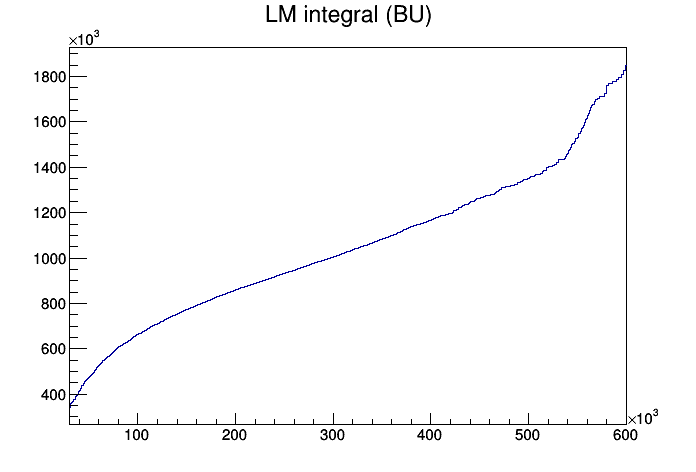

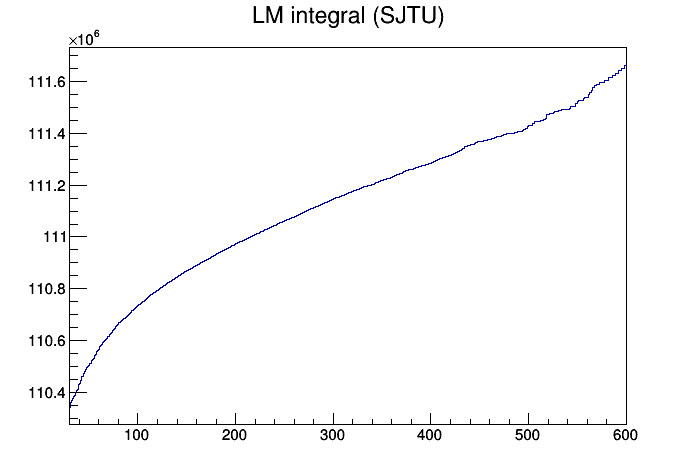

In [75]:

f_lm_bu = R.TFile('/Users/cheng/WorkRun4/data/nominal_fit/gm2pro_daq_offline_dqc_run4U_5307A_makeBULostMuons_gridRun.root','read')
f_lm_sjtu = R.TFile('/Users/cheng/WorkRun4/data/nominal_fit/Run4U_lm_int_resub.root','read')

h_bu = f_lm_bu.Get('integral_hist')
h_sjtu = f_lm_sjtu.Get('integral_hist')

c1 = R.TCanvas()
h_bu.SetStats(0)
h_bu.GetXaxis().SetRangeUser(30e3,600e3)
h_bu.SetTitle('LM integral (BU)')
h_bu.Draw()
c1.Draw()

c2 = R.TCanvas()
h_sjtu.SetStats(0)
h_sjtu.GetXaxis().SetRangeUser(30,600)
h_sjtu.SetTitle('LM integral (SJTU)')
h_sjtu.Draw()
c2.Draw()

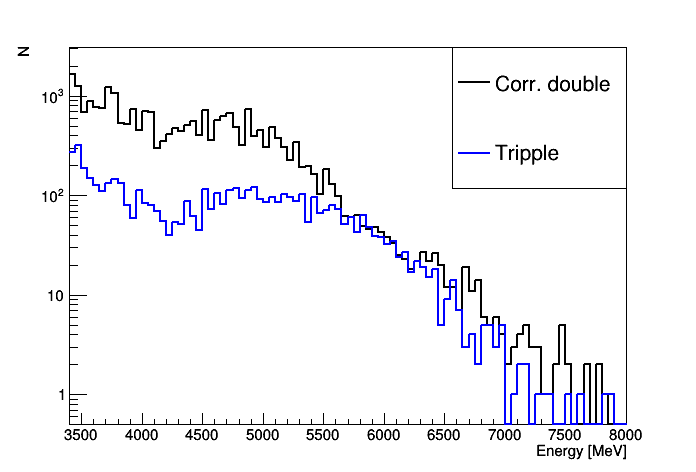

In [66]:
raw = f.Get('energy_raw').Clone()
corr = f.Get('subs_e').Clone()
pu_d = f.Get('pileup_e_double').Clone()
pu_t = f.Get('pileup_e_tri').Clone()


corr_d = raw.Clone()
corr_d.Add(pu_d,-1)

names = ['Corr. double','Tripple']
colors = [R.kBlack,R.kBlue,R.kRed,R.kGreen]
hists = [corr_d,pu_t]

c = R.TCanvas()
c.SetLogy(1)
leg = R.TLegend(0.65,0.6,0.9,0.9)
for n in range(2):
    hists[n] = ABS(hists[n])
    hists[n].Rebin(5)
    hists[n].SetStats(0)
    hists[n].SetLineColor(colors[n])
    hists[n].SetLineWidth(2)
    hists[n].GetXaxis().SetRangeUser(3400,8000)
    
    # hists[n].GetYaxis().SetRangeUser(-100,100)
    leg.AddEntry(hists[n],names[n],'l')
    hists[n].Draw('histsame')
    hists[n].SetTitle(';Energy [MeV]; N')
leg.Draw()
c.Draw()



 FCN=19.0519 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          43 TOTAL
                     EDM=1.55519e-18    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.00231e+00   1.07642e-03   1.07642e-03  -1.63842e-06


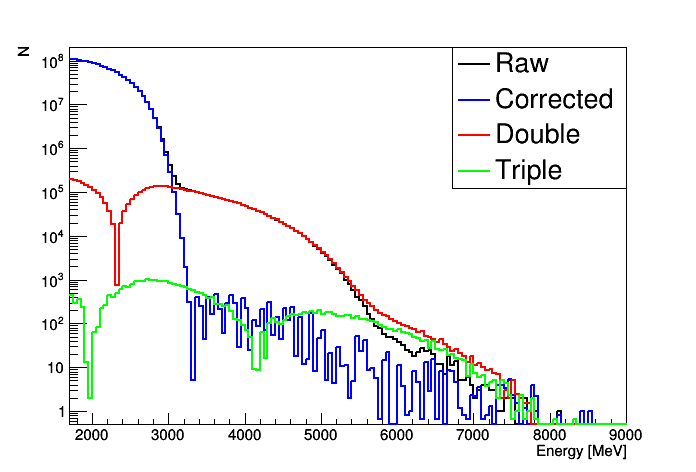

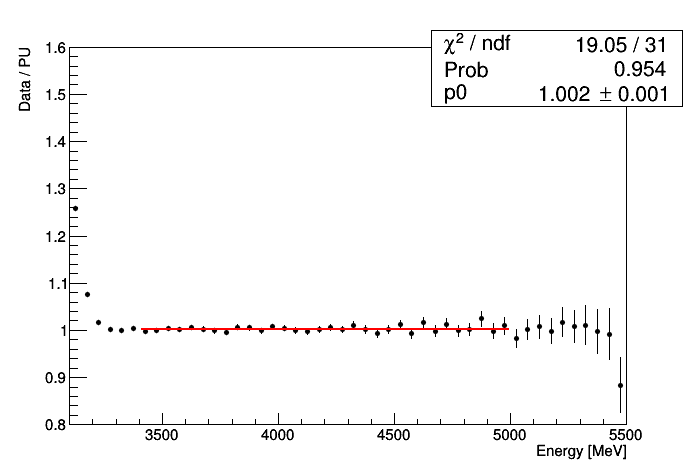

In [67]:
f = R.TFile('/Users/cheng/WorkRun4/data/nominal_fit/Run4U_empirical_nominal.root')

raw = f.Get('topDir/Iter0/RawHists/RawHist/rawTimesAndEnergies').Clone()
# corr = f.Get('subs_e').Clone()
pu_d = f.Get('topDir/Iter0/EmpiricalPileupHists/Added/addedPileupTimesAndEnergies_1stOrder').Clone()
pu_t = f.Get('topDir/Iter0/EmpiricalPileupHists/Added/addedPileupTimesAndEnergies_2ndOrder').Clone()

corr = raw.Clone()
corr.Add(pu_d,-1)
corr.Add(pu_t,-1)

names = ['Raw','Corrected','Double','Triple']
colors = [R.kBlack,R.kBlue,R.kRed,R.kGreen]
hists_2d = [raw,corr,pu_d,pu_t]

hists = []
hists_r = []
hists_r2 = []
for n in range(4):
    
    t_min, t_max = hists_2d[n].GetXaxis().FindBin(30e3),hists_2d[n].GetXaxis().FindBin(600e3)
    h_1d = hists_2d[n].ProjectionY(names[n]+'Py',t_min,t_max)
    hists.append(h_1d)
    hists_r.append(h_1d.Clone())
    hists_r2.append(h_1d.Clone())


    

c = R.TCanvas()
c.SetLogy(1)
leg = R.TLegend(0.65,0.6,0.9,0.9)
for n in range(4):
    hists[n] = ABS(hists[n])
    hists[n].SetStats(0)
    hists[n].SetLineColor(colors[n])
    hists[n].SetLineWidth(2)
    hists[n].GetXaxis().SetRangeUser(1700,9000)
    leg.AddEntry(hists[n],names[n],'l')
    hists[n].Draw('histsame')
    hists[n].SetTitle(';Energy [MeV]; N')
leg.Draw()
c.Draw()



c2 = R.TCanvas()
ratio = hists_r[0]
pu = hists_r[2]
put = hists_r[3]
pu.Add(put)


ratio.Sumw2()



# ratio.Divide(pu)
# ratio.Rebin(2)
# pu.Rebin(2)
func = R.TF1('linefit','[0]',3400,5000)
ratio.Divide(pu)
ratio.GetXaxis().SetRangeUser(3100,5500)
ratio.GetYaxis().SetRangeUser(0.8,1.6)

# ratio.Draw('hist')


# pu.Draw('same')
ratio.Draw('e')
ratio.SetMarkerSize(0.6)
ratio.SetMarkerColor(1)
ratio.SetMarkerStyle(8)
# ratio.SetStats(0)
ratio.SetLineColor(1)
ratio.SetTitle(';Energy [MeV]; Data / PU')
ratio.Fit('linefit','REMS')
line = R.TLine(3100,1,5500,1)
func.SetLineWidth(2)
# print (ratio.GetXaxis().GetBinWidth(1))
# line.Draw()

c2.Draw()

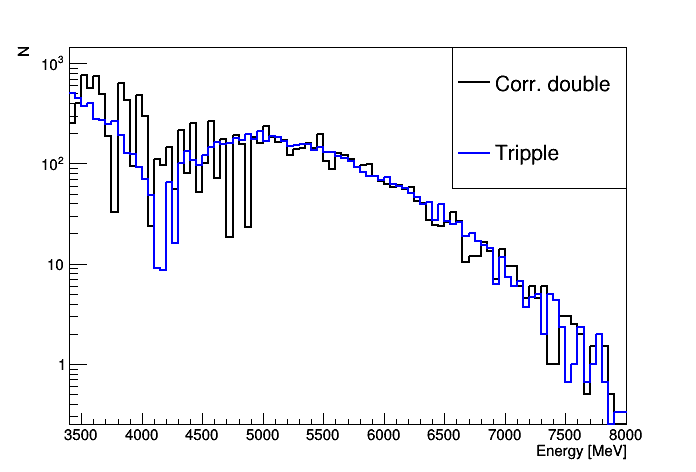

In [62]:

raw = hists_r2[0]
pu_d = hists_r2[2]
pu_t = hists_r2[3]

corr_d = raw.Clone()
corr_d.Add(pu_d,-1)

names = ['Corr. double','Tripple']
colors = [R.kBlack,R.kBlue,R.kRed,R.kGreen]
hists = [corr_d,pu_t]

c = R.TCanvas()
c.SetLogy(1)
leg = R.TLegend(0.65,0.6,0.9,0.9)
for n in range(2):
    hists[n] = ABS(hists[n])

    hists[n].SetStats(0)
    hists[n].SetLineColor(colors[n])
    hists[n].SetLineWidth(2)
    hists[n].GetXaxis().SetRangeUser(3400,8000)
    # hists[n].GetYaxis().SetRangeUser(-100,100)
    leg.AddEntry(hists[n],names[n],'l')
    hists[n].Draw('histsame')
    hists[n].SetTitle(';Energy [MeV]; N')
leg.Draw()
c.Draw()

